In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [21]:
df=pd.read_csv('train_2.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435


### Data fields
These are the different attributes present in the dataset with a description of what they each mean

* **id** - a unique identifier for each trip
* **vendor_id** - a code indicating the provider associated with the trip record
* **pickup_datetime** - date and time when the meter was engaged
* **dropoff_datetime** - date and time when the meter was disengaged
* **passenger_count** - the number of passengers in the vehicle (driver entered value)
* **pickup_longitude** - the longitude where the meter was engaged
* **pickup_latitude** - the latitude where the meter was engaged
* **dropoff_longitude** - the longitude where the meter was disengaged
* **dropoff_latitude** - the latitude where the meter was disengaged
* **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* **trip_duration** - duration of the trip in seconds

In [3]:
df.shape


(500000, 11)

In [60]:
df.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        1
dropoff_datetime      23
passenger_count       14
pickup_longitude      15
pickup_latitude       11
dropoff_longitude      9
dropoff_latitude       4
store_and_fwd_flag     2
trip_duration          0
dtype: int64

### Looking for missing values
Now we will look at how complete our data is and if we are dealing with any missing data

As we can see above we have a few missing values, and there are two major ways of dealing with this
* **Removing the rows with missing values** : If the number of rows containing missing data is much smaller than the overall dataset size, we can just remove the rows with missing values

* **Filling missing values** : We can also fill in the missing values with values derived from the rest of the data. Eg: Replace every missing value with the mean of that column

In [4]:
print("Old Dataset length :",df.shape[0])
df=df.dropna(axis=0)

Old Dataset length : 500000


In [5]:
print("New Dataset length :",df.shape[0])

New Dataset length : 499925


### Lets remove some pesky data
So now that our data is almost cleaned, let's go ahead and shoot a few of the unnecessary columns out of the dataset. Ask the instructor for what these poor columns did to deserve this horrible fate

P.S : They were just being too difficult to deal with for now

In [9]:
df=df.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,1.0,-73.982155,40.767937,-73.964630,40.765602,455
1,1.0,-73.980415,40.738564,-73.999481,40.731152,663
2,1.0,-73.979027,40.763939,-74.005333,40.710087,2124
3,1.0,-74.010040,40.719971,-74.012268,40.706718,429
4,1.0,-73.973053,40.793209,-73.972923,40.782520,435


### Let's get on with the machine learning already! Splitting the data

Ok I hear you, it's a machine learning workshop, but just one more step and then we'll do some machine learning. 

Now we'll split our data into training and testing samples. We'll use the testing data to understand how well our model is performing.

As per common practices we'll split our data into a 80:20 ratio.
This means that 80% of our data will be used for training and 20% for testing


In [14]:
from sklearn.model_selection import train_test_split
labels=df['trip_duration']
df_train=df.drop(['trip_duration'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)

In [17]:
print (y_train.head())

471945     358
347664    1064
240009    1979
231479     633
195105    1551
Name: trip_duration, dtype: int64


In [16]:
print (x_test.head())

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
284621              1.0        -73.954254        40.766949         -73.970505   
365385              2.0        -73.983681        40.747005         -73.978386   
3261                2.0        -74.177780        40.690281         -74.177780   
380546              1.0        -73.978821        40.756321         -73.985413   
233743              2.0        -74.001747        40.730648         -73.993553   

        dropoff_latitude  
284621         40.757923  
365385         40.749420  
3261           40.690281  
380546         40.747379  
233743         40.724468  


In [18]:
print("Training data length:",x_train.shape[0])
print("Testing data length:",x_test.shape[0])

Training data length: 399940
Testing data length: 99985


### Finally the moment you've been waiting for ....
Now let's get on to building a simple linear regression model.
All we'll try to do is fit a straight line through our data and then predict new values

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Now we check how good our model actually is
We do this by using the testing data that we had initially set aside. We predict the expected time of the taxi ride for those data values and then compare against what the actual duration of the ride was

In [20]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 9150685.978494773
Root Mean Squared Error (RMSE) of the model is : 3025.0100790732536


### Time for some feature engineering

Feature engineering is the task of gaining more insights from your data and creating features that would help your model perform better. 

In this dataset let's add the difference of longitudes and latitudes so that we get a relative distance measure. We can also add in attributes for the time of day, which day of the week as well as which day of the year the taxi ride occurs

In [22]:
df=pd.read_csv('train_2.csv')
df=df.dropna(axis=0)

### Using the timestamp information
We will infer a variety of new data from the given timestamps, such as the which day of the week it is ( We all know the horrible monday morning traffic), the hour of the day and which day of the year 

In [23]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime=pd.to_datetime(df.dropoff_datetime)
df['hour'] = df.pickup_datetime.dt.hour
df['year'] = df.pickup_datetime.dt.year
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,17,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,0,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,13,2016


### Adding geospatial information

Sounds pretty fancy right? well it's just information about the difference between the longitudes and latitudes of the pickup and dropoff location

In [24]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [25]:
df['distance_miles'] = distance(df.pickup_latitude, df.pickup_longitude, \
                                     df.dropoff_latitude, df.dropoff_longitude)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,distance_miles
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,17,2016,0.931138
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,0,2016,1.121890
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,2016,3.967516
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2016,0.923046
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,13,2016,0.738555


### Some quick cleanup
We remove all the old features that we had used to generate new ones, they are redundant now

In [27]:
df=df[['passenger_count','trip_duration','hour','year','distance_miles']]

In [28]:
labels=df['trip_duration']
df_train=df.drop(['trip_duration'],axis=1)

### Back to the magic of machine learning

We use the same code as above for training and testing our new and hopefully imrpoved model

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 9892125.24098611
Root Mean Squared Error (RMSE) of the model is : 3145.1749142116264


In [38]:
model.score(x_test,y_test)

0.02580822029356411

### That sure is an improvement! 
See our magical feature engineering worked! We have improved our model by just applying simple intuition

### Now we're going to try see how data transforms work
For this I am going to plot the distribution of the different attributes in the dataset

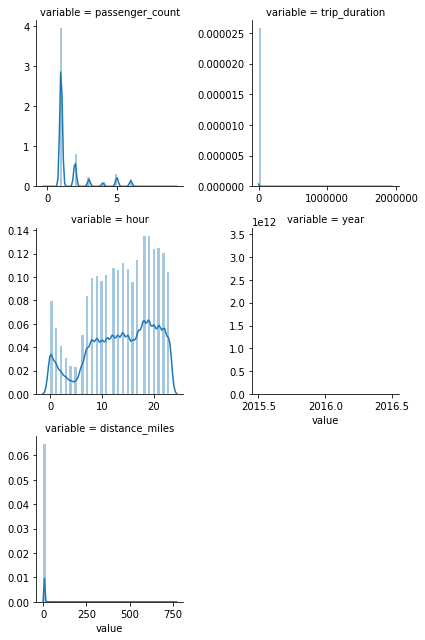

In [40]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

As we can clearly observe that the data is mostly skewed, this could be because an attribute has most of it's values in a small range. Or it could be beacuse of outliers. We will use log transforms to get reduce the skewness

In [41]:
def log_transform(feature):
    df[feature] = np.log1p(df[feature].values)

In [42]:
log_transform('trip_duration')
log_transform('passenger_count')
log_transform('distance_miles')

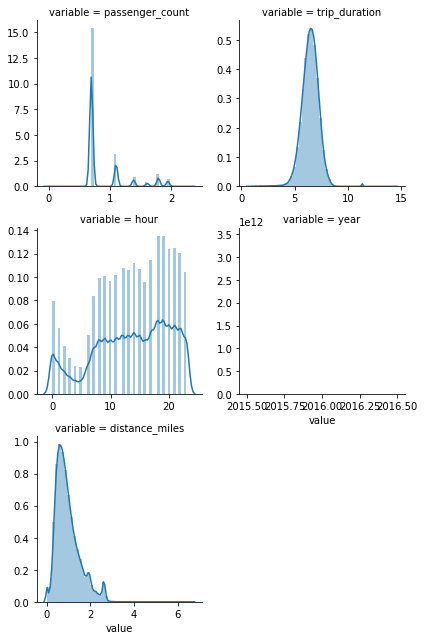

In [49]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [44]:
labels=df['trip_duration']
df_train=df.drop(['trip_duration'],axis=1)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)

In [46]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 0.28252694358748476
Root Mean Squared Error (RMSE) of the model is : 0.5315326364274209


In [48]:
model.score(x_test,y_test)

0.551258267994227

### So that was a huge leap.....
As we saw using log transforms helped us get a huge boost in how well the model fits. This is mainly because the data is now moved towards normality and the outlier influence on the model is greatly reduced

### Let's try a few more advanced forms of regression

Starting with a decision tree regression model. A decision tree is just a simple structure with each of the nodes of the tree an attribute, and the leaves are the target variable. 

In [50]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(max_depth=2,min_samples_leaf=5, min_samples_split= 5,max_leaf_nodes=10)  
regressor.fit(x_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
predictions=regressor.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 0.2677561125761685
Root Mean Squared Error (RMSE) of the model is : 0.5174515557771263


In [52]:
regressor.score(x_test,y_test)

0.5747189978170808

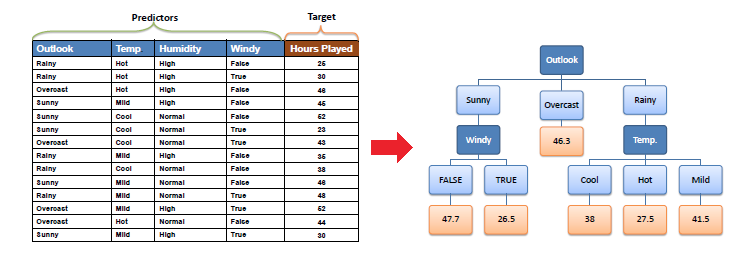

### Let's try some regularization now

Regularization helps us avoid overfitting, so it helps us generalize better and therefore improve the quality of the model.

In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model=Ridge()
model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 0.28252696288362367
Root Mean Squared Error (RMSE) of the model is : 0.5315326545788355


In [57]:
model.score(x_test,y_test)

0.5512582373458834